In [6]:
num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

In [8]:
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]
daily_hours = [dm / 60 for dm in daily_minutes]

In [71]:
outlier = num_friends.index(100)
num_friends_good = [x
                    for i, x in enumerate(num_friends)
                    if i != outlier]

daily_minutes_good = [x
                      for i, x in enumerate(daily_minutes)
                      if i != outlier]

In [1]:
def predict(alpha: float, beta: float, x_i: float) -> float:
    return beta * x_i + alpha

In [2]:
def error(alpha: float, beta:float, x_i: float, y_i: float) -> float:
    # y_i는 실제 결과값을 의미한다.
    return predict(alpha, beta, x_i) - y_i

In [3]:
from scratch.linear_algebra import Vector

In [4]:
def sum_of_sqerrors(alpha: float, beta: float, x: Vector, y: Vector) -> float:
    return sum(error(alpha, beta, x_i, y_i) ** 2 for x_i, y_i in zip(x, y))

### 최소자승법(least squares)
sum_of_sqerrors를 최소화해 주는 alpha와 beta를 찾는 방법이다.

In [36]:
from typing import Tuple
from scratch.linear_algebra import Vector
from scratch.statistics import correlation, standard_deviation, mean, covariance
import random

x와 y가 학습 데이터로 주어졌을 때
오류의 제곱 값을 최소화시키는 알파와 베타를 계산한다.

In [62]:
def least_squares_fit(x: Vector, y: Vector) -> Tuple[float, float]:
    beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta

In [63]:
print(least_squares_fit(num_friends, daily_minutes))

(27.008491305583856, 0.27501188078936734)


In [52]:
x = [i for i in range(-100, 110, 10)]
y = [3 * i - 5 for i in x]

In [53]:
import matplotlib.pyplot as plt

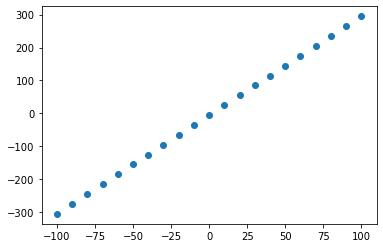

상관관계: 1.0, 표준편차: x 62.048368229954285. y 186.14510468986285, 평균: x 0.0, y -5.0
기울기: 3.0, y절편: -5.0


In [54]:
plt.scatter(x, y)
plt.show()
print('상관관계: {}, 표준편차: x {}. y {}, 평균: x {}, y {}'.format(
    correlation(x, y), standard_deviation(x), standard_deviation(y), mean(x), mean(y)))
print('기울기: {}, y절편: {}'.format(correlation(x, y) * standard_deviation(y) / standard_deviation(x), mean(y) - correlation(x, y) * standard_deviation(y) / standard_deviation(x) * mean(x)))

In [55]:
print(covariance(x, y) / standard_deviation(x) / standard_deviation(x))

3.0


In [56]:
print(covariance(x, y))

11550.0


In [57]:
print(correlation(x, y))

1.0


### 결정계수 R
결정계수: 종속 변수의 총 변화량 중 모델이 잡아낼 수 있는 변화량의 비율<br>
모델이 잡아낼 수 있는 변화량의 비율이란 '1 - 모델이 잡아내지 못하는 변화량의 비율'로 나타낼 수 있으며<br>
모델이 잡아내지 못하는 변화량의 비율은 '에러들의 제곱의 합 / 전체 변화량의 제곱의 합'으로 나타낼 수 있다.

In [58]:
from scratch.statistics import de_mean

In [59]:
def total_sum_of_squares(y: Vector) -> float:
    return sum(v ** 2 for v in de_mean(y))

In [65]:
def r_squared(alpha: float, beta: float, x: Vector, y: Vector) -> float:
    return 1.0 - (sum_of_sqerrors(alpha, beta, x, y) / total_sum_of_squares(y))

In [73]:
alpha, beta = least_squares_fit(num_friends_good, daily_minutes_good)

rsq = r_squared(alpha, beta, num_friends_good, daily_minutes_good)

print(rsq)

0.3291078377836305


In [74]:
alpha, beta = least_squares_fit(x, y)

rsq = r_squared(alpha, beta, x, y)

print(rsq)

1.0


### 최대가능도추정법